In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from construct import *

import sys
sys.path.append('/home/scott/Dropbox/satobs/STEREO_A/')
import ccsds

import collections
import datetime
import struct

plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
def process_frames(input_file, output_file):
    frame_length = 8952
    new_frame_length = 8920
    bits_to_remove = 32

    with open(input_file, 'rb') as f_in, open(output_file, 'wb') as f_out:
        while True:
            frame = f_in.read(frame_length // 8)  # Read frame in bytes
            if not frame:  # Reached end of file
                break
            new_frame = frame[bits_to_remove // 8:]  # Remove first 32 bits
            f_out.write(new_frame)

    print(f"Processed {input_file}. New file saved as {output_file}.")

#satdump .cadu filename
input_filename = '/home/scott/Dropbox/satobs/STEREO_A/secchi/SECCHI/stereo_a_merged.cadu'

#stripped output file compatible with the script below
output_filename = 'output_frames.bin'
process_frames(input_filename, output_filename)


Processed /home/scott/Dropbox/satobs/STEREO_A/secchi/SECCHI/stereo_a_merged.cadu. New file saved as output_frames.bin.


In [3]:
def load_frames(file):
    frame_size = 223 * 5
    frames = np.fromfile(file, dtype = 'uint8')
    return frames[:frames.size//frame_size*frame_size].reshape(-1, frame_size)

#frames = load_frames('stereo-a_bg2bhc_frames_20220924_0710.raw')
#frames = load_frames('stereo-a_bg2bhc_frames_20220924_1035.raw')
frames = load_frames('output_frames.bin')

In [4]:
# Filename extensions 

# .711 COR2
# .725 hi_1
# .734 hi_2
# .743 EUV


In [5]:
import numpy as np

def print_ascii_sequences(frames):
    ascii_sequence = ""
    for byte in np.nditer(frames):
        if 32 <= byte <= 126:
            ascii_sequence += chr(byte)
        else:
            if len(ascii_sequence) > 11:
                print(ascii_sequence)
            ascii_sequence = ""
    if len(ascii_sequence) > 1:
        print(ascii_sequence)



#print ASCII strings greater than 11 chars long, these tend to be filenames.
print_ascii_sequences(frames)


kN62504ZC.743
kN62504ZC.743
N62504ZY.711
N62504ZY.711
kN625050T.743
kN625050T.743
N6252512.734
?MKYY[[g_eakaekouikggeaYSA
CV:AEPFEE(AM6?:G>
N6252512.734
N625051T.711
kN625051W.743
kN625051W.743
N626000F.711
N626000F.711
N626000J.711
N626000J.711
N626000N.711
N626000N.711
kN626001N.743
kN626001N.743
N626002U.711
N626002U.711
kN626002Y.743
kN626002Y.743
kN626004A.743
kN626004A.743
N626004V.711
N626004V.711
kN626005I.743
kN626005I.743
N626006O.711
kN626006S.743
kN6260086.743
D+DTEOF@F?@t@
kN6260086.743
N626008O.711
DLEQFEFG@C@lB
?.3Wlq9Hha]r
N626008O.711
N626008S.711
N626008S.711
N626008W.711
N626008W.711
kN626009P.743
kN627006S.743
kN6270086.743
kN6270086.743
N627008O.711
N627008W.711
kN627009P.743
kN627009P.743
N62720A2.725
N62720A2.725
N62700AS.711
N62700AS.711
kN62700AV.743
kN62700AV.743
kN62700C4.743
kN62700C4.743
N62700CQ.711
kN62700DJ.743
?QS_Y[Wg[gikaeikqkmii_UU]A
K,cI|/C<pJ<.
N62720DU.734
N62700EL.711
kN62700EO.743
kN62700FJ.743
kN62700FJ.743
N62724MK.734
N62704NB.711
kN62704NE.7

@HB1An?,>P@`
N701251W.734
N701052N.711
N701052N.711
kN701052Q.743
kN701052Q.743
N702000F.711
N702000F.711
N702000J.711
N702000J.711
N702000N.711
N702000N.711
kN702001N.743
kN702001N.743
N702002U.711
N702002U.711
kN702002Y.743
kN702002Y.743
kN702004A.743
kN702004A.743
N702004V.711
N702004V.711
kN702005I.743
kN702005I.743
N702006O.711
kN702006S.743
kN702006S.743
kN7020086.743
kN7020086.743
N702008O.711
N702008O.711
N702008S.711
N702008S.711
N702008W.711
FuFh@q@NBd=O?
N702008W.711
kN702009P.743
kN702009P.743
N70220A2.725
N70220A2.725
N70200AS.711
N70200AS.711
kN70200AV.743
kN70200C4.743
kN70200C4.743
N70200CQ.711
FY>jB-?e?,<0?
kN70200DJ.743
kN70200DJ.743
N70220DU.734
COES__]gUkesgomoskoki]]]Q
h.:~+$lVx`nAb
N70220DU.734
N70200EL.711
N70200EL.711
kN70200EO.743
kN70200EO.743
kN70200FJ.743
kN70200FJ.743
N70200FV.711
N70200FZ.711
N70200G3.711
N70200G3.711
kN70200GZ.743
kN70200GZ.743
N70200I6.711
N70200I6.711
kN70200IA.743
kN70200IA.743
kN70200JM.743
N70204HK.711
N70204HK.711
N70204HO.711
N7020

## TM Primary Headers

The frames are TM Space Data Link frames. The spacecraft ID is 234 (0xEA). Virtual channels 0 and 7 are in use. OCF and secondary headers are used.

In [6]:
TMPrimaryHeader = BitStruct(
    'transfer_frame_version_number' / BitsInteger(2),
    'spacecraft_id' / BitsInteger(10),
    'virtual_channel_id' / BitsInteger(3),
    'ocf_flag' / Flag,
    'master_channel_frame_count' / BitsInteger(8),
    'virtual_channel_frame_count' / BitsInteger(8),
    'secondary_header_flag' / Flag,
    'synch_flag' / Flag,
    'packet_order_flag' / Flag,
    'segment_length_id' / BitsInteger(2),
    'first_header_pointer' / BitsInteger(11)
)

TransferFrameSecondaryHeaderId = BitStruct(
    'version_number' / BitsInteger(2),
    'header_length' / BitsInteger(6)
)

CLCW = BitStruct(
    'control_word_type' / Flag,
    'clcw_version_number' / BitsInteger(2),
    'status_field' / BitsInteger(3),
    'cop_in_effect' / BitsInteger(2),
    'virtual_channel_identification' / BitsInteger(6),
    'rsvd_spare' / BitsInteger(2),
    'no_rf_avail' / Flag,
    'no_bit_lock' / Flag,
    'lock_out' / Flag,
    'wait' / Flag,
    'retransmit' / Flag,
    'farm_b_counter' / BitsInteger(2),
    'rsvd_spare2' / BitsInteger(1),
    'report_value' / BitsInteger(8)
)

In [7]:
tm = [TMPrimaryHeader.parse(f) for f in frames]
scid = np.array([h.spacecraft_id for h in tm])
vcid = np.array([h.virtual_channel_id for h in tm])
v_framecount = np.array([h.virtual_channel_frame_count for h in tm])
m_framecount = np.array([h.master_channel_frame_count for h in tm])

In [8]:
tm[:5]

[Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=7, ocf_flag=True, master_channel_frame_count=81, virtual_channel_frame_count=16, secondary_header_flag=True, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=0),
 Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=7, ocf_flag=True, master_channel_frame_count=84, virtual_channel_frame_count=19, secondary_header_flag=True, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=0),
 Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=7, ocf_flag=True, master_channel_frame_count=85, virtual_channel_frame_count=20, secondary_header_flag=True, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=0),
 Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=7, ocf_flag=True, master_channel_frame_count=86, virtual_channel_frame_count=2

In [9]:
collections.Counter(scid)

Counter({234: 7418})

In [10]:
collections.Counter(vcid)

Counter({7: 7238, 0: 180})

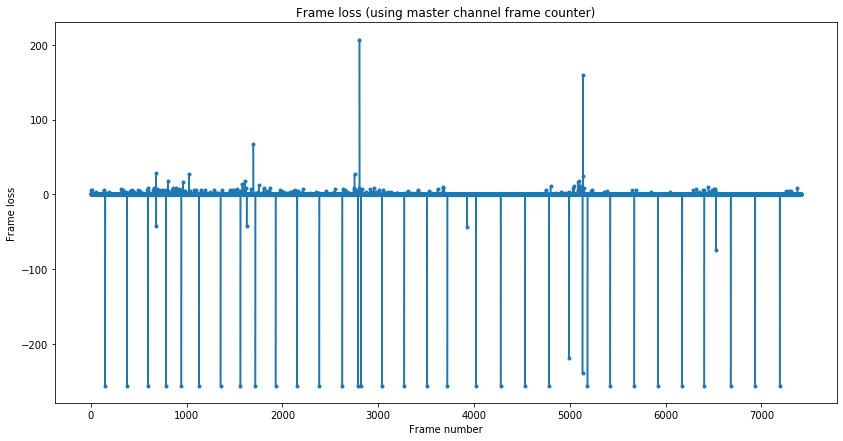

In [11]:
plt.plot(np.diff(m_framecount) - 1, '.-')
plt.title('Frame loss (using master channel frame counter)')
plt.ylabel('Frame loss')
plt.xlabel('Frame number');

## TM Secondary Header

The TM Secondary Header contains a timestamp giving the seconds since 2006-10-25 12:00 UTC as a 32-bit integer, plus an additional 8-bit integer that counts 1/256-ths of a second. The remaining 9 bytes of the header are filled with `0x00` in the virtual channel 7 frames and with `0xff` in the virtual channel 0 frames.

In [12]:
sec_header_id = [TransferFrameSecondaryHeaderId.parse(f[TMPrimaryHeader.sizeof():])
                 for f in frames]
all([sec_header_id[0] == h for h in sec_header_id])

True

In [13]:
sec_header_id[0]

Container(version_number=0, header_length=14)

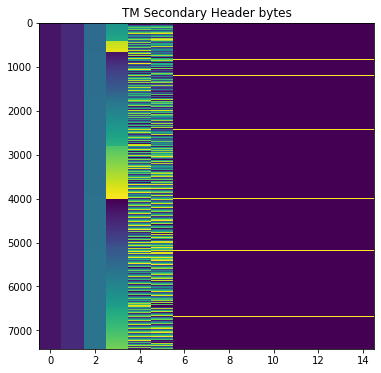

In [14]:
plt.figure(figsize=(6, 6))
plt.imshow(frames[:, 6:6+15], interpolation='none', aspect='auto')
plt.title('TM Secondary Header bytes');

In [15]:
np.all(frames[vcid != 0, 12:6+15] == 0)

True

In [16]:
np.all(frames[vcid == 0, 12:6+15] == 0xff)

True

In [17]:
#timestamps_secs = (
   # frames[:, 7:11].view('uint32').byteswap().ravel().astype('float')+ frames[:, 11].astype('float') / 256)
    
timestamps_secs = (frames[:, 7:11].copy().view('uint32').byteswap().ravel().astype('float')+ frames[:, 11].astype('float') / 256)


In [18]:
np.diff(timestamps_secs)

array([42.4296875 , 14.140625  , 14.14453125, ..., 14.140625  ,
       14.14453125, 14.140625  ])

In [19]:
(5*223*8 + 4 + 32) * 6 / 3.8e3

14.141052631578948

In [20]:
1/256

0.00390625

In [21]:
datetime.datetime(2022, 9, 24, 10, 35, 0) - datetime.timedelta(seconds=timestamps_secs[0])

datetime.datetime(2006, 1, 23, 22, 48, 45, 238281)

In [22]:
epoch = np.datetime64('2006-10-25T12:00:00')

In [23]:
timestamps = epoch + np.timedelta64(1, 'ns') * (timestamps_secs * 1e9)

In [24]:
timestamps[0]

numpy.datetime64('2023-06-25T23:46:14.761718720')

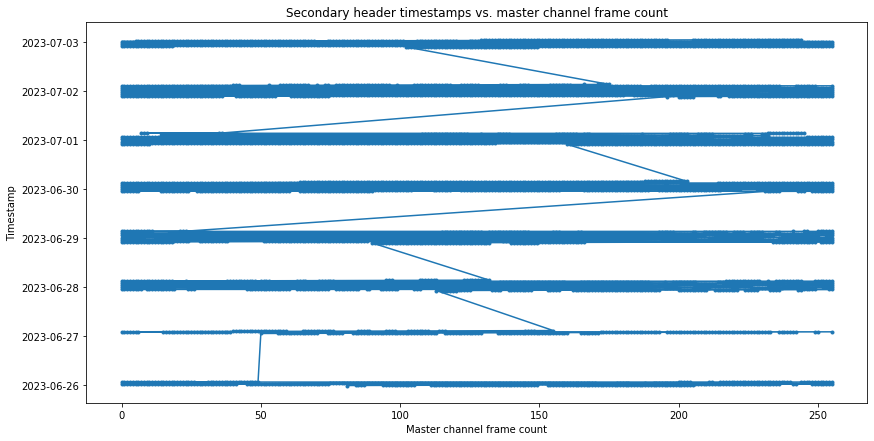

In [25]:
plt.plot(m_framecount, timestamps, '.-')
plt.title('Secondary header timestamps vs. master channel frame count')
plt.xlabel('Master channel frame count')
plt.ylabel('Timestamp');

## Operational Control Field

The operational control field shows receiver lock, event though the frequency of the downlink transmitter changes during the recording (indicating loss of ground lock).

In [26]:
ocf = frames[:, -6:-2]
np.all(ocf == ocf[0])

False

In [27]:
print(CLCW.parse(ocf[0]))

Container: 
    control_word_type = False
    clcw_version_number = 0
    status_field = 0
    cop_in_effect = 1
    virtual_channel_identification = 2
    rsvd_spare = 0
    no_rf_avail = False
    no_bit_lock = False
    lock_out = False
    wait = False
    retransmit = False
    farm_b_counter = 3
    rsvd_spare2 = 0
    report_value = 18


## Virtual channel 0

Frames in virtual channel 0 carry OID (only idle data). The transfer frame data field is filled with `0xff` bytes.

In [28]:
[h for h in tm if h.virtual_channel_id == 0]

[Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=0, ocf_flag=True, master_channel_frame_count=139, virtual_channel_frame_count=5, secondary_header_flag=True, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=2046),
 Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=0, ocf_flag=True, master_channel_frame_count=148, virtual_channel_frame_count=6, secondary_header_flag=True, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=2046),
 Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=0, ocf_flag=True, master_channel_frame_count=104, virtual_channel_frame_count=7, secondary_header_flag=True, synch_flag=False, packet_order_flag=False, segment_length_id=3, first_header_pointer=2046),
 Container(transfer_frame_version_number=0, spacecraft_id=234, virtual_channel_id=0, ocf_flag=True, master_channel_frame_count=167, virtual_channel_fra

In [29]:
np.all(frames[vcid == 0][:, 12:-6] == 0xff)

True

## Virtual channel 7

Frames in virtual channel 7 contain 4 Space Packets with a length of 272 bytes (which divides the transfer frame data field evenly in 4). The Space Packets in the non-idle APIDs have a Secondary Header with a 32-bit timestamp giving the number of seconds since the CCSDS time code epoch 1958-01-01 00:00:00 TAI.

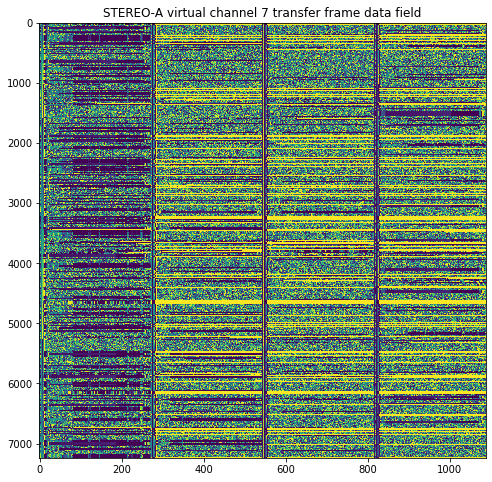

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(frames[vcid == 7, 6+15:-6], interpolation='none', aspect='auto')
plt.title('STEREO-A virtual channel 7 transfer frame data field');

In [31]:
# 265 bytes = Space Packet data length field (indicates length-1)
# 6 bytes = Space Packet primary header
# 4 Space Packets per TM frame
# 6 bytes = TM Primary Header
# 15 bytes = TM Secondary Header
# 4 bytes = OCF (CLCW)
# 2 bytes = FECF (CRC-16)
(265 + 1 + 6) * 4 + 6 + 15 + 4 + 2 == frames.shape[1]

True

In [32]:
packet_len = 265 + 1 + 6

In [33]:
packet_headers = [ccsds.SpacePacketPrimaryHeader.parse(f[6+15+k*packet_len:])
                  for f in frames[vcid == 7] for k in range(4)]

In [34]:
packet_headers[:5]

[Container(ccsds_version=0, packet_type=0, secondary_header_flag=True, APID=1140, sequence_flags=3, packet_sequence_count_or_name=13229, data_length=265),
 Container(ccsds_version=0, packet_type=0, secondary_header_flag=True, APID=1140, sequence_flags=3, packet_sequence_count_or_name=13230, data_length=265),
 Container(ccsds_version=0, packet_type=0, secondary_header_flag=True, APID=1140, sequence_flags=3, packet_sequence_count_or_name=13231, data_length=265),
 Container(ccsds_version=0, packet_type=0, secondary_header_flag=True, APID=624, sequence_flags=3, packet_sequence_count_or_name=8259, data_length=265),
 Container(ccsds_version=0, packet_type=0, secondary_header_flag=True, APID=1393, sequence_flags=3, packet_sequence_count_or_name=1, data_length=265)]

In [35]:
collections.Counter([h.ccsds_version for h in packet_headers])

Counter({0: 28952})

In [36]:
collections.Counter([h.packet_type for h in packet_headers])

Counter({0: 28952})

In [37]:
collections.Counter([h.secondary_header_flag for h in packet_headers])

Counter({True: 25976, False: 2976})

In [38]:
collections.Counter([h.APID for h in packet_headers])

Counter({1140: 7635,
         624: 1751,
         1393: 1748,
         880: 1750,
         2047: 2976,
         0: 305,
         1137: 9181,
         1139: 3036,
         1138: 570})

In [39]:
apids = {h.APID for h in packet_headers}
{apid: collections.Counter([
    h.secondary_header_flag
    for h in packet_headers if h.APID == apid]) for apid in apids}

{0: Counter({True: 305}),
 624: Counter({True: 1751}),
 1393: Counter({True: 1748}),
 880: Counter({True: 1750}),
 1137: Counter({True: 9181}),
 1140: Counter({True: 7635}),
 1139: Counter({True: 3036}),
 1138: Counter({True: 570}),
 2047: Counter({False: 2976})}

In [40]:
collections.Counter([h.sequence_flags for h in packet_headers])

Counter({3: 28952})

In [41]:
collections.Counter([h.data_length for h in packet_headers])

Counter({265: 28952})

In [42]:
space_packets = [f[6+15+k*packet_len:][:packet_len]
                 for f in frames[vcid == 7] for k in range(4)]
by_apid = {apid: [] for apid in apids}
for packet, header in zip(space_packets, packet_headers):
    by_apid[header.APID].append(packet)
by_apid = {apid: np.array(by_apid[apid]) for apid in apids}

In [43]:
#for apid in apids:
#    data = by_apid[apid]
#    plt.figure(figsize=(8, 8 * data.shape[0] / 100))
#    plt.imshow(data, interpolation='none', aspect='auto')
#    plt.title(f'STEREO-A space weather beacon APID {apid}')

def write_binary_file(data_array, file_path):
    # Convert the array to bytes
    data_bytes = data_array.tobytes()

    # Write the bytes to a file
    with open(file_path, 'wb') as file:
        file.write(data_bytes)

def write_apids_to_files(apids, by_apid):
    for apid in apids:
        data = by_apid[apid]

        # Generate a unique file name for each APID
        file_path = f'output_{apid}.bin'

        # Write the data to a binary file
        write_binary_file(data, file_path)

        # Plotting code (optional)
        #commented out to reduce file size
        #plt.figure(figsize=(8, 8 * data.shape[0] / 100))
        #plt.imshow(data, interpolation='none', aspect='auto')
        #plt.title(f'STEREO-A space weather beacon APID {apid}')
        #plt.show()

write_apids_to_files(apids, by_apid)

In [44]:
non_idle = [h.APID != 2047 for h in packet_headers]
packet_timestamps_secs = np.array(space_packets)[non_idle, 6:10].view('uint32').byteswap().ravel()

In [45]:
datetime.datetime(2022, 9, 24, 10, 35, 0) - datetime.timedelta(seconds=int(packet_timestamps_secs[0]))

datetime.datetime(1957, 4, 1, 11, 5, 6)

In [46]:
ccsds_epoch = np.datetime64('1958-01-01T00:00:00')
packet_timestamps = ccsds_epoch + np.timedelta64(1, 's') * packet_timestamps_secs
packet_timestamps[0]

numpy.datetime64('2023-06-25T23:29:54')

In [47]:
apids_for_timestamps = np.array([h.APID for h in packet_headers if h.APID != 2047])
tmtimestaps_for_timestamps = np.repeat(timestamps[vcid == 7], 4)[non_idle]

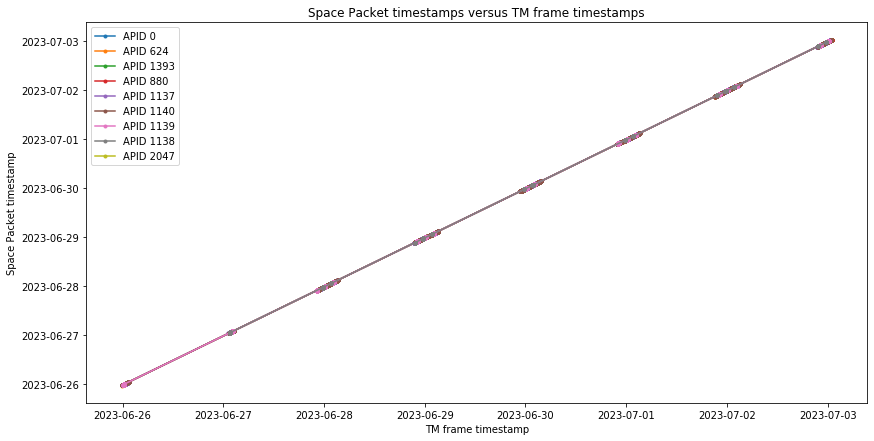

In [48]:
for apid in apids:
    sel = apids_for_timestamps == apid
    plt.plot(tmtimestaps_for_timestamps[sel], packet_timestamps[sel], '.-',
             label=f'APID {apid}')
plt.legend()
plt.title('Space Packet timestamps versus TM frame timestamps')
plt.xlabel('TM frame timestamp')
plt.ylabel('Space Packet timestamp');

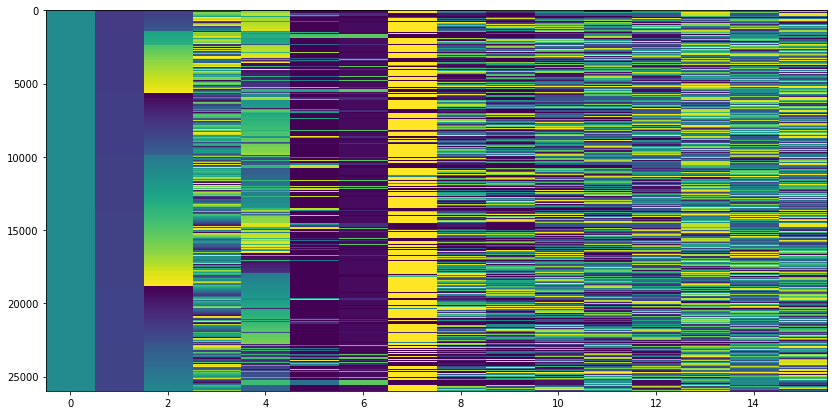

In [49]:
plt.imshow(np.array(space_packets)[non_idle, 6:6+16], aspect='auto', interpolation='none');

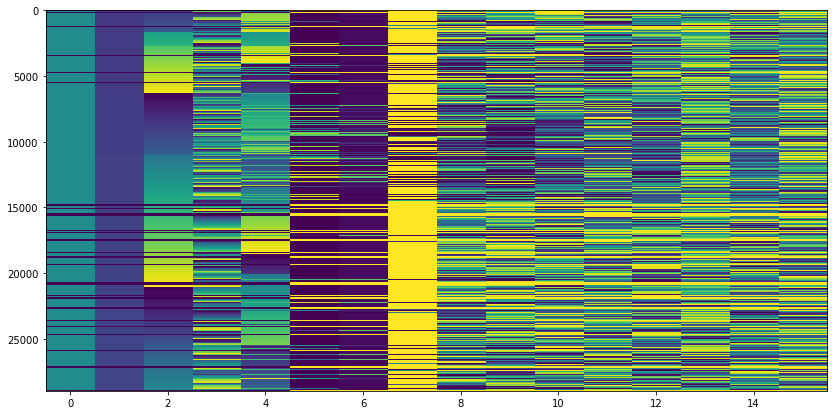

In [50]:
plt.imshow(np.array(space_packets)[:, 6:6+16], aspect='auto', interpolation='none');

## S/WAVES beacon data

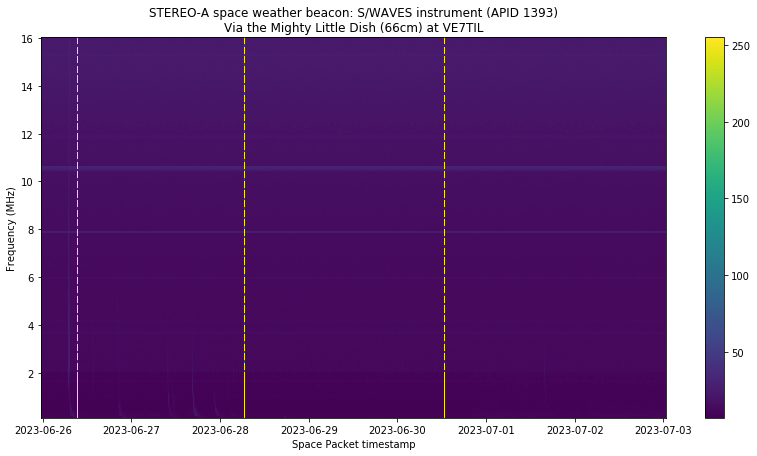

In [51]:
swaves_data = by_apid[1393][:, 29:29+159]
swaves_timestamps = packet_timestamps[apids_for_timestamps == 1393]

plt.imshow(swaves_data.T[::-1], aspect='auto', interpolation='none',
           extent=[mdates.date2num(swaves_timestamps[0]),
                   mdates.date2num(swaves_timestamps[-1]),
                   0.125, 16.025,])
plt.gca().xaxis_date()
plt.colorbar()
plt.title('STEREO-A space weather beacon: S/WAVES instrument (APID 1393)\nVia the Mighty Little Dish (66cm) at VE7TIL')
plt.xlabel('Space Packet timestamp')
plt.ylabel('Frequency (MHz)');

In [52]:
swaves_timestamps

array(['2023-06-25T23:30:48', '2023-06-25T23:31:48',
       '2023-06-25T23:33:48', ..., '2023-07-03T00:40:31',
       '2023-07-03T00:41:31', '2023-07-03T00:42:31'],
      dtype='datetime64[s]')

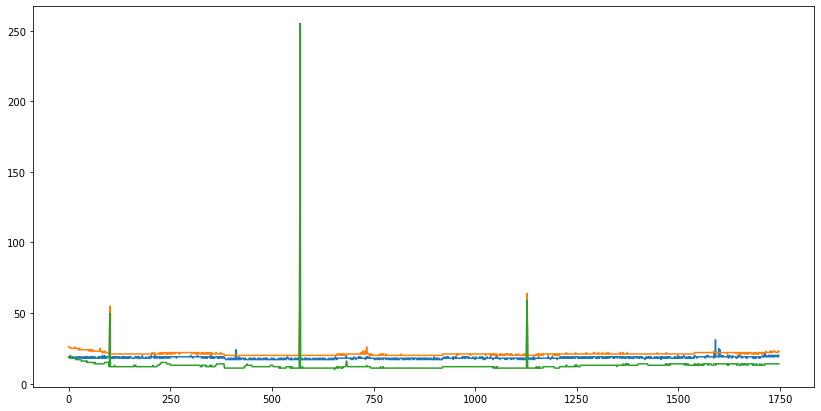

In [53]:
plt.plot(by_apid[1393][:, 26:29]);

Text(0.5, 0, 'Space Packet timestamp')

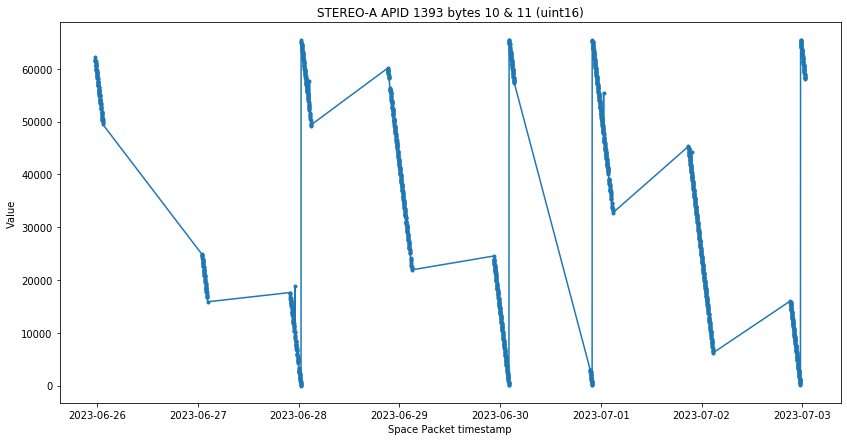

In [54]:
plt.plot(swaves_timestamps, by_apid[1393][:, 10:12].copy().view('uint16').byteswap(), '.-')
plt.title('STEREO-A APID 1393 bytes 10 & 11 (uint16)')
plt.ylabel('Value')
plt.xlabel('Space Packet timestamp')
